# Ariel's Preliminary EDA for 6/28

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Download data set here https://www.dropbox.com/s/j1t9u1y4lwhouqk/cps_00001%20copy.csv?dl=0

In [3]:
df = pd.read_csv('/Users/Ariel/Desktop/cps_00001.csv') #update cd after dropbox download file name is now 'cps_00001 copy.csv'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Ariel/Desktop/cps_00001.csv'

In [5]:
df.shape

(4372482, 109)

In [4]:
df.columns

NameError: name 'df' is not defined

In [6]:
df.head()

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,PERNUM,WTFINL,...,HINTAKE3,HINTAKE4,HINTAKE5,HINTAKE6,HINTAKE7,HINTAKE8,HIOFFER,KIDCAID,GOTWIC,KIDCNEED
0,2009,1,3,NaN,20071202814500,1.0,NaN,534.34,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2009,1,3,NaN,20071202814500,1.0,NaN,534.34,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2009,2,3,NaN,20071202885100,1.0,NaN,546.24,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2009,2,3,NaN,20071202885100,1.0,NaN,546.24,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2009,3,3,NaN,20071202862500,1.0,NaN,287.76,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


# Preliminary Analysis of Survey Respondents currently on Medicaid

In [11]:
MCAID_df = df[df['HIMCAIDLY'] == 2] # 2 means respondent answered yes to currently being on medicaid

In [12]:
MCAID_df.groupby('YEAR').count()

,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,HINTAKE3,HINTAKE4,HINTAKE5,HINTAKE6,HINTAKE7,HINTAKE8,HIOFFER,KIDCAID,GOTWIC,KIDCNEED
YEAR,,,,,,,,,,,,,,,,,,,,,
2009,30903,30903,0,30903,30903,0,30903,30903,0,30903,...,0,0,0,0,0,0,0,30903,30903,30903
2010,34735,34735,0,34735,34735,0,34735,34735,0,34735,...,0,0,0,0,0,0,0,34735,34735,34735
2011,34267,34267,0,34267,34267,0,34267,34267,0,34267,...,0,0,0,0,0,0,0,34267,34267,34267
2012,34865,34865,0,34865,34865,0,34865,34865,0,34865,...,0,0,0,0,0,0,0,34865,34865,34865
2013,35340,35340,0,35340,35340,0,35340,35340,0,35340,...,0,0,0,0,0,0,0,35340,35340,35340
2014,36907,36907,0,36907,36907,36907,36907,36907,0,36907,...,36907,36907,36907,36907,36907,36907,36907,36907,36907,36907
2015,40673,40673,0,40673,40673,0,40673,40673,0,40673,...,40673,40673,40673,40673,40673,40673,40673,40673,40673,40673
2016,38746,38746,0,38746,38746,0,38746,38746,0,38746,...,38746,38746,38746,38746,38746,38746,38746,38746,38746,38746
2017,38713,38713,0,38713,38713,0,38713,38713,0,38713,...,38713,38713,38713,38713,38713,38713,38713,38713,38713,38713


In [13]:
MCAID_df = df[['HIMCAIDLY', 'YEAR', 'AGE', 'INCTOT']]

For the purposes of this data exercise, I am choosing to work with limited variables to save time in recoding

In [14]:
MC_df = MCAID_df[MCAID_df['HIMCAIDLY'] == 2]

This variable represents someone answering yes to currently being on Medicaid during the ACES surbey period

In [15]:
MC_df.groupby('YEAR').count()

,HIMCAIDLY,AGE,INCTOT
YEAR,,,
2009,30903,30903,30903
2010,34735,34735,34735
2011,34267,34267,34267
2012,34865,34865,34865
2013,35340,35340,35340
2014,36907,36907,36907
2015,40673,40673,40673
2016,38746,38746,38746
2017,38713,38713,38713


There is a relatively small sample of Medicaid recipients and I have not broken down by geographic region yet.

I am concerned that my sample size might be too small by the time I focus in on only New York City. 

I may need to find another data set to better hone in on this population

In [24]:
MC_df.groupby('YEAR').mean()

,HIMCAIDLY,AGE,INCTOT
YEAR,,,
2009,2.0,23.333560,4.892792e+08
2010,2.0,23.089103,4.889945e+08
2011,2.0,23.276505,4.885523e+08
2012,2.0,24.075376,4.736337e+08
2013,2.0,23.922750,4.757568e+08
2014,2.0,23.384073,4.706498e+08
2015,2.0,24.638581,4.394158e+08
2016,2.0,24.792417,4.289052e+08
2017,2.0,25.509493,4.183706e+08


Interestingly, the average total income for the Medicaid population seems to be decreasing over time. I wonder if that has to do with the geography of the sample, i.e., more people from states without Medicaid expansion so to qualify they have to have a lower income. For further work on the project, I need to control for geographic region in my dataset.

In [25]:
MC_df.describe()

,HIMCAIDLY,YEAR,AGE,INCTOT
count,424095.0,424095.000000,424095.000000,4.240950e+05
mean,2.0,2014.517344,24.616958,4.481696e+08
std,0.0,3.328155,21.243920,4.972987e+08
min,2.0,2009.000000,0.000000,-1.349900e+04
25%,2.0,2012.000000,8.000000,8.000000e+03
50%,2.0,2015.000000,17.000000,3.533400e+04
75%,2.0,2017.000000,39.000000,1.000000e+09
max,2.0,2020.000000,85.000000,1.000000e+09


# Data Visualizations

## Bar plots tracking Medicaid users over time

In [19]:
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
MY = MC_df[['YEAR', 'HIMCAIDLY']]

In [21]:
MY

,YEAR,HIMCAIDLY
11,2009,2.0
13,2009,2.0
14,2009,2.0
15,2009,2.0
16,2009,2.0
...,...,...
2890857,2020,2.0
2890858,2020,2.0
2890859,2020,2.0
2890877,2020,2.0


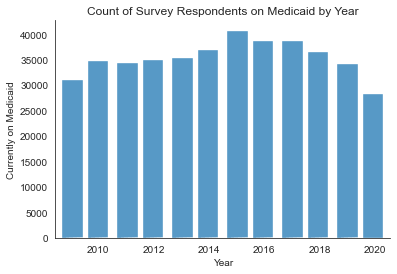

In [22]:
sns.set_style('white')
fig, ax = plt.subplots()
sns.histplot(data=MY, x='YEAR')
change_width(ax, .75)
plt.ylabel('Currently on Medicaid')
plt.xlabel('Year')
plt.title('Count of Survey Respondents on Medicaid by Year')
sns.despine()

I am struggling with plotting a chart that also includes on Medicaid by age. I think it might be because there are too many ages? See below for how a plot including age turns out

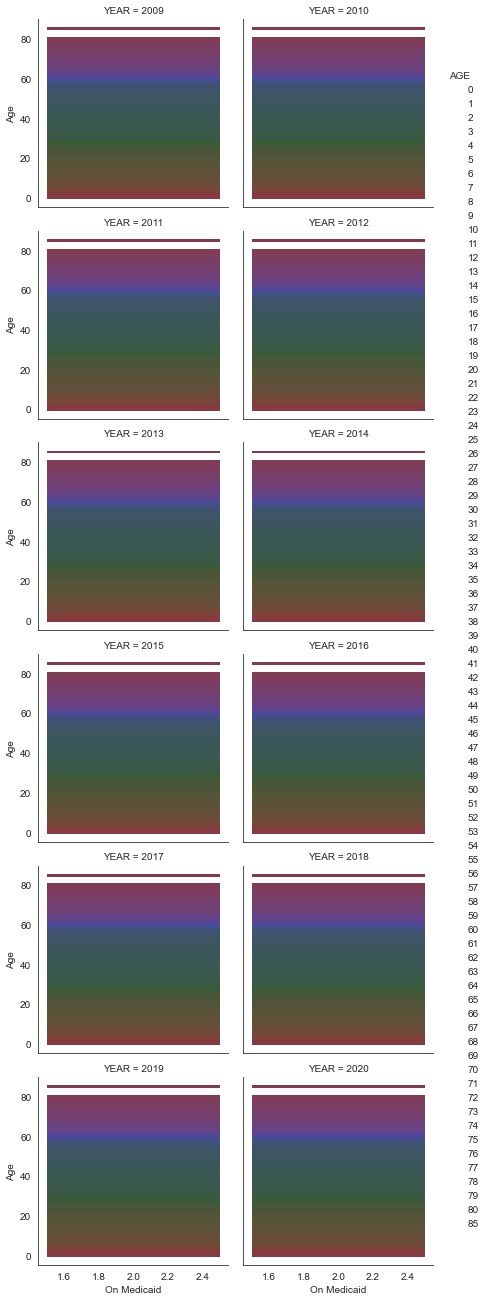

In [41]:
g = sns.FacetGrid(MC_df, col="YEAR", hue='AGE', col_wrap=2)
g.map_dataframe(sns.histplot, x='HIMCAIDLY', y='AGE')
g.set_axis_labels('On Medicaid', 'Age')
g.add_legend()

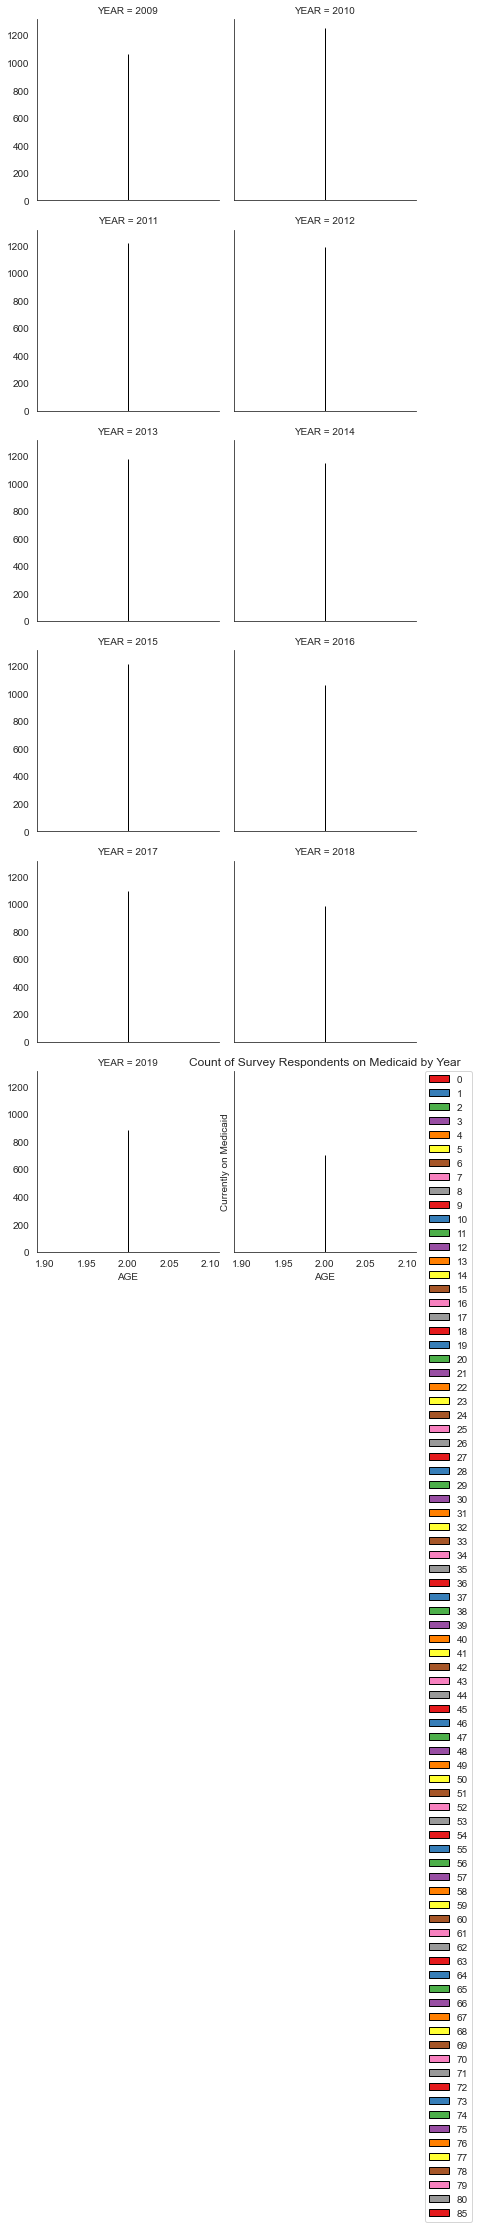

In [27]:
bins = np.linspace(MC_df.HIMCAIDLY.min(), MC_df.HIMCAIDLY.max(), 10)
i = sns.FacetGrid(MC_df, col="YEAR", hue="AGE", palette="Set1", col_wrap=2)
i.map(plt.hist, 'HIMCAIDLY', bins=bins, ec="k")
i.axes[-1].legend()

# sns.set_style('darkgrid')
# fig, ax = plt.subplots()
# sns.histplot(data=MC_df, x='YEAR', hue='AGE')
# change_width(ax, .75)
plt.ylabel('Currently on Medicaid')
# plt.xlabel('Year')
plt.title('Count of Survey Respondents on Medicaid by Year')
# plt.show()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Neither of these charts are giving me exactly what I want. I need to figure out a way to bin the ages so that there is a clearer visualization of the count by age. I also am not sure that this is giving me the count by age to begin with.

In [21]:
plt.xkcd() # run this line if you want the coolest plots EVER - DA

In [22]:
plt.rcdefaults() # run this line to return plots to noraml settings

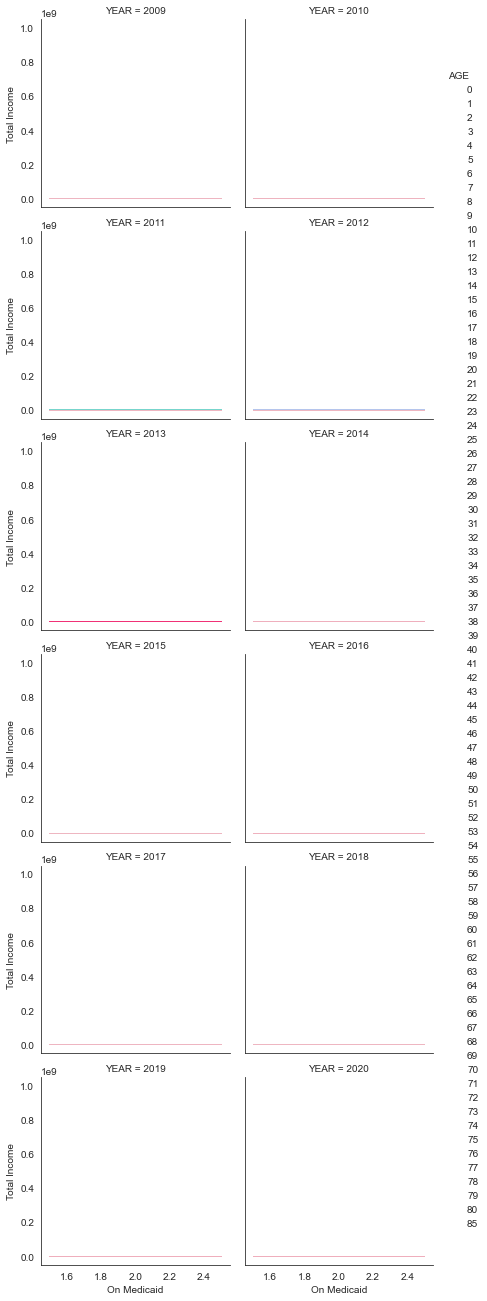

In [43]:
j = sns.FacetGrid(MC_df, col="YEAR", hue='AGE', col_wrap=2)
j.map_dataframe(sns.histplot, x='HIMCAIDLY', y='INCTOT')
j.set_axis_labels('On Medicaid', 'Total Income')
j.add_legend()

# attempted visualization of total yearly income and medicaid status, do not run

My data visualizations have not worked out well so far or provided any insight. (Maxwell, I would really appreicate any guidance on next steps for this.)



# Basic Regression Analysis

A simple linear regression of the impact on having Medicaid on total income

In [39]:
model = sm.OLS(df['INCTOT'].dropna(), df['HIMCAIDLY'].dropna()).fit()
predictions = model.predict(df['HIMCAIDLY']) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 INCTOT   R-squared (uncentered):                   0.272
Model:                            OLS   Adj. R-squared (uncentered):              0.272
Method:                 Least Squares   F-statistic:                          8.653e+05
Date:                Sat, 26 Jun 2021   Prob (F-statistic):                        0.00
Time:                        15:59:59   Log-Likelihood:                     -4.9176e+07
No. Observations:             2314863   AIC:                                  9.835e+07
Df Residuals:                 2314862   BIC:                                  9.835e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient is huge! I ran this regression incorrectly and I'm not sure why it is giving me this output.

If anyone has any ideas how to fix this, I would appreciate it!